<a name="top"></a>Contents
===
- [Introduction](#intro)

- [Libraries](#libraries)

- [Dataset](#dataset)
    - [Read dataset](#read_data)
    - [Customize dataset](#customize_data)
    
- [Distribution of journeys](#distribution)
    
- [Number of touchpoints](#touchpoints)
    
- [Save data](#save)


------------------------------------------------------------------------------------------------------
<a name='intro'></a>
# Introduction

In this notebook, it is going to be analyzed the following projects of data selected from 1 oct 2018 to 31 mar 2019 in order to analyze the performance of channels, focusing in advertising channels:
    <br>**Distribution of journeys**: the quantity of conversions per lenght of journeys.
    <br>**Number of touchpoints**: total number of touchpoints of the different channels that led to conversion during the selected time period.
    
Due to this studies, it will be able to establish the most important channels that affect to a final conversion in this ecommerce. 

-----------------------------------------------------------------------------------
<a name='libraries'></a>
# Libraries

First of all, it is necessary to import the required libraries to develop all the steps correctly of this notebook.

In [1]:
#import libraries
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline


#import filter warnings
import warnings
warnings.filterwarnings('ignore')


#display a maximum of 500 columns and rows
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

#set directory of work
path = '/home/miguel/my_project_python/my_project_env/tfm/ufo'
os.chdir(path)

-----------------------------------------------------------------------------------
<a name='dataset'></a>
# Dataset

In this chapter, it is developed the following steps:
    - Read dataset
    - Check information
    - Customize

<a name='read_data'></a>
## Read dataset
Read and check the information

In [2]:
#read data
df_ufo = pd.read_csv('./data/raw/ufo_ga_oct_18_mar19.csv', sep = ";")

Check the data

In [3]:
df_ufo.tail()

,index,path,total_conversions,total_conversion_value
3420,3421,DISPLAY GOOGLE > CRITEO > DIRECTO > DIRECTO > ...,1,210.0
3421,3422,DISPLAY GOOGLE > CRITEO > ORGANICO > CRITEO > ...,1,60.0
3422,3423,DISPLAY GOOGLE > DIRECTO > DIRECTO,1,149.0
3423,3424,DISPLAY GOOGLE > BRANDING > BRANDING > BRANDIN...,1,25.0
3424,3425,DISPLAY GOOGLE > BRANDING > DISPLAY GOOGLE > D...,1,32.0


In [4]:
df_ufo.shape

(3425, 4)

In [5]:
df_ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 4 columns):
index                     3425 non-null int64
path                      3425 non-null object
total_conversions         3425 non-null int64
total_conversion_value    3425 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 107.1+ KB


<a name='customize_data'></a>
## Customize dataset
Customize the dataset to make it workable

In [6]:
#replace
df_ufo['path'] = df_ufo['path'].str.replace(" ","")

#check the data
df_ufo.tail()

,index,path,total_conversions,total_conversion_value
3420,3421,DISPLAYGOOGLE>CRITEO>DIRECTO>DIRECTO>DIRECTO>E...,1,210.0
3421,3422,DISPLAYGOOGLE>CRITEO>ORGANICO>CRITEO>DISPLAYGO...,1,60.0
3422,3423,DISPLAYGOOGLE>DIRECTO>DIRECTO,1,149.0
3423,3424,DISPLAYGOOGLE>BRANDING>BRANDING>BRANDING>BRANDING,1,25.0
3424,3425,DISPLAYGOOGLE>BRANDING>DISPLAYGOOGLE>DISPLAYGO...,1,32.0


-----------------------------------------------------------------------------------
<a name='distribution'></a>
# Distribution of journeys
It is measured the quantity of conversions per lenght of journeys. 

In [7]:
#copy the dataframe in another one
df_journeys = df_ufo

#count the number of journeys
df_journeys['Journeys_count'] = (df_journeys.apply(lambda x: x['path'].count('>'), axis=1))+1

#head
df_journeys.head(10)

,index,path,total_conversions,total_conversion_value,Journeys_count
0,1,ORGANICO,952,71.694,1
1,2,BRANDING,756,64.660,1
2,3,DIRECTO,587,60.832,1
3,4,SHOPPING,512,33.929,1
4,5,ORGANICO>DIRECTO,325,28.412,2
5,6,DIRECTO>DIRECTO,203,22.207,2
6,7,SEARCH,182,9.324,1
7,8,BRANDING>BRANDING,169,13.525,2
8,9,ORGANICO>DIRECTO>DIRECTO,157,14.695,3
9,10,BRANDING>DIRECTO,147,17.005,2


Now, groupby by "journeys_count"

In [8]:
#groupby
df_journeys = df_journeys.groupby(by='Journeys_count').agg({'total_conversions':'sum'})

#reset index
df_journeys = df_journeys.reset_index()

#display
df_journeys

,Journeys_count,total_conversions
0,1,3399
1,2,2048
2,3,1356
3,4,930
4,5,642
5,6,504
6,7,364
7,8,271
8,9,246
9,10,198


As we can observe in the table, the shorter the path conversion, the more number of final conversions. 

**¿How many journeys are needed to achieve the 80% of conversions?**

In [9]:
#reset index
df_journeys.reset_index(inplace = True)

#create cumpercentage column
df_journeys['Cumpercentage'] = df_journeys['total_conversions'].cumsum()/df_journeys['total_conversions'].sum()*100

#select references
references_selected = np.min(df_journeys.loc[df_journeys['Cumpercentage'] > 80, 'index'])

#print
print('The number path conversions needed to achieve 80% of cumpercantege is',references_selected)

The path conversions needed to achieve 80% of cumpercantege is 5


Display the result in a figure

<Figure size 72000x720000 with 0 Axes>

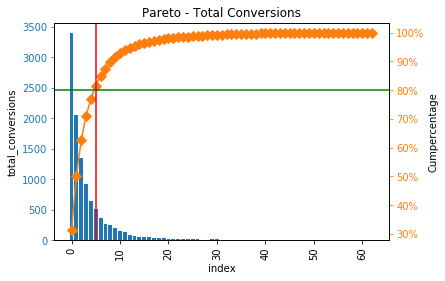

In [27]:
#set figure
plt.figure(figsize=(1000,10000))
fig, ax = plt.subplots()

#set xticks
ax.bar(df_journeys.index, df_journeys['total_conversions'], color='C0')
plt.xticks(rotation='vertical')
ax2 = ax.twinx()
ax2.plot(df_journeys.index, df_journeys['Cumpercentage'], color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

#set params
ax.tick_params(axis='y', direction='out', colors='C0')
ax2.tick_params(axis='y', direction='out', colors='C1')

#set title for the plot and labels
plt.title('Pareto - Total Conversions')

ax.set_xlabel('index')
ax.set_ylabel('total_conversions')
ax2.set_ylabel('Cumpercentage')

#ax.set_title('Pareto - Units Sold')
#ax2.set_title('ax2 title')
plt.axvline(round(np.min(df_journeys.loc[df_journeys['Cumpercentage'] > 80, 'index']),2), color='r')
plt.axhline(80, color = 'green')


#show
plt.show()
fig.savefig('./img/pareto_total_convesion.png', dpi = 180)

From previous results, it is set that it is just needed from 1 to 5 sessions per user to accomplish the 80% of conversions of this ecommerce.

-----------------------------------------------------------------------------------
<a name='touchpoints'></a>
# Number of touchpoints

It is measured the total number of touchpoints of the different channels that led to conversion during the selected time period.

In [11]:
#split the data from path column by the delimiter ">"
df_split = df_ufo.path.str.rsplit('>', n = 1000, expand = True).rename(columns = lambda x: 'path{}'.format(x + 1))

#head data
df_split.tail()

,path1,path2,path3,path4,path5,path6,path7,path8,path9,path10,path11,path12,path13,path14,path15,path16,path17,path18,path19,path20,path21,path22,path23,path24,path25,path26,path27,path28,path29,path30,path31,path32,path33,path34,path35,path36,path37,path38,path39,path40,path41,path42,path43,path44,path45,path46,path47,path48,path49,path50,path51,path52,path53,path54,path55,path56,path57,path58,path59,path60,path61,path62,path63,path64,path65,path66,path67,path68,path69,path70,path71,path72,path73,path74,path75,path76,path77,path78,path79,path80,path81,path82,path83,path84,path85,path86,path87,path88,path89,path90,path91,path92,path93,path94,path95,path96,path97,path98,path99,path100,path101,path102,path103,path104,path105,path106,path107,path108,path109,path110,path111,path112,path113,path114,path115,path116,path117,path118,path119,path120,path121,path122,path123,path124,path125,path126,path127,path128,path129,path130,path131,path132,path133,path134,path135,path136,path137,path138,path139,path140,path141,path142,path143,path144,path145,path146,path147,path148,path149,path150,path151,path152,path153,path154,path155,path156,path157,path158,path159,path160,path161,path162,path163,path164,path165,path166,path167,path168,path169,path170,path171,path172,path173,path174,path175,path176,path177,path178,path179,path180,path181,path182,path183,path184,path185,path186,path187,path188,path189,path190,path191,path192,path193,path194,path195,path196,path197,path198,path199,path200,path201,path202,path203,path204,path205,path206,path207,path208,path209,path210,path211,path212,path213,path214,path215,path216,path217,path218,path219,path220,path221,path222,path223,path224,path225,path226,path227,path228,path229,path230,path231,path232,path233,path234,path235,path236
3420,DISPLAYGOOGLE,CRITEO,DIRECTO,DIRECTO,DIRECTO,EMAIL,FACEBOOK,CRITEO,DIRECTO,EMAIL,DIRECTO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3421,DISPLAYGOOGLE,CRITEO,ORGANICO,CRITEO,DISPLAYGOOGLE,CRITEO,SMART,DISPLAYGOOGLE,CRITEO,DISPLAYGOOGLE,SMART(impression),SMART(impression),SMART(impression),SMART(impression),BRANDING,BRANDING,BRANDING,DIRECTO,BRANDING,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,

Concatenate two dataframes: df_split and df_ufo

In [12]:
#concatenate the split data with total conversions
df_concat = pd.concat([df_split, df_ufo['total_conversions']], 1)

#head
df_concat.head()

,path1,path2,path3,path4,path5,path6,path7,path8,path9,path10,path11,path12,path13,path14,path15,path16,path17,path18,path19,path20,path21,path22,path23,path24,path25,path26,path27,path28,path29,path30,path31,path32,path33,path34,path35,path36,path37,path38,path39,path40,path41,path42,path43,path44,path45,path46,path47,path48,path49,path50,path51,path52,path53,path54,path55,path56,path57,path58,path59,path60,path61,path62,path63,path64,path65,path66,path67,path68,path69,path70,path71,path72,path73,path74,path75,path76,path77,path78,path79,path80,path81,path82,path83,path84,path85,path86,path87,path88,path89,path90,path91,path92,path93,path94,path95,path96,path97,path98,path99,path100,path101,path102,path103,path104,path105,path106,path107,path108,path109,path110,path111,path112,path113,path114,path115,path116,path117,path118,path119,path120,path121,path122,path123,path124,path125,path126,path127,path128,path129,path130,path131,path132,path133,path134,path135,path136,path137,path138,path139,path140,path141,path142,path143,path144,path145,path146,path147,path148,path149,path150,path151,path152,path153,path154,path155,path156,path157,path158,path159,path160,path161,path162,path163,path164,path165,path166,path167,path168,path169,path170,path171,path172,path173,path174,path175,path176,path177,path178,path179,path180,path181,path182,path183,path184,path185,path186,path187,path188,path189,path190,path191,path192,path193,path194,path195,path196,path197,path198,path199,path200,path201,path202,path203,path204,path205,path206,path207,path208,path209,path210,path211,path212,path213,path214,path215,path216,path217,path218,path219,path220,path221,path222,path223,path224,path225,path226,path227,path228,path229,path230,path231,path232,path233,path234,path235,path236,total_conversions
0,ORGANICO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,952
1,BRANDING,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,

Create a list with columns

In [13]:
c = df_concat.columns.tolist()

Make a loop to save each path as a csv

In [14]:
for i in range(len(c)-1):
    #groupby
    df_groupby = df_concat.groupby(by=c[i]).agg({'total_conversions':'sum'})
    
    #reset index
    df_groupby = df_groupby.reset_index()
    
    #rename columns
    df_groupby = df_groupby.rename(index=str, columns={c[i]:'path'})
    
    #set file
    file = c[i]
    
    #save as csv
    df_groupby.to_csv('./data/touchpoints/' + file + '.csv')

Read and concat the previous files created

In [15]:
#format extension
extension = 'csv'

#find filenames
all_filenames = [i for i in glob.glob('./data/touchpoints/*.{}'.format(extension))]

#combine all files in the list
df = pd.concat([pd.read_csv(f, sep=',', error_bad_lines=True, index_col=0) for f in all_filenames])

Groupby the file to display the touhcpoints per channel

In [16]:
#groupby
df = df.groupby(by='path').agg({'total_conversions':'sum'}).sort_values(by='total_conversions', ascending=False)

#reset index
df = df.reset_index()

#rename
df = df.rename(index=str, columns = {'path': 'Channel', 'total_conversions': 'Touchpoints'})

#show
df

,Channel,Touchpoints
0,DIRECTO,20739
1,BRANDING,8818
2,SHOPPING,5406
3,ORGANICO,4829
4,CRITEO,1736
5,SEARCH,1526
6,FACEBOOK,1118
7,EMAIL,968
8,SMART(impression),960
9,SMART,659


**¿How many touchpoints are in total?**

In [18]:
#print
print('The number of touchpoints are',df['Touchpoints'].sum())

The number of touchpoints are 48015


From those results, "DIRECTO" channel achieved almost a half of total touchpoints. It is the most important channel in order to accomplish a transaction.

<br> If the studied is focused only in advertising channels, the most important one is SHOPPING. This channels has a total number of 5406 touchpoints. 

<br> **For this reason, it is going to be analyzed the performance of SHOPPING and the most valued features to improve its profitability.**

-----------------------------------------------------------------------------------
<a name='save'></a>
# Save data

Save the datasets

In [19]:
#save distribution of journeys
df_journeys.to_csv('./data/final/journeys.csv', sep=',')

#save number of touchpoints
df.to_csv('./data/final/touchpoints.csv', sep=',')